STAT 479: Machine Learning (Fall 2019)  
Instructor: Sebastian Raschka (sraschka@wisc.edu)  
Course website: http://pages.stat.wisc.edu/~sraschka/teaching/stat479-fs2019/

# L04: Scientific Computing in Python

In [1]:
%load_ext watermark

In [2]:
%watermark -v -a 'Sebastian Raschka' -p numpy,scipy,matplotlib

Sebastian Raschka 

CPython 3.7.3
IPython 7.7.0

numpy 1.16.4
scipy 1.3.1
matplotlib 3.1.1


## NumPy -- Working with Numerical Arrays

### Introduction to NumPy

This section offers a quick tour of the NumPy library for working with multi-dimensional arrays in Python. NumPy (short for Numerical Python) was created by Travis Oliphant in 2005, by merging Numarray into Numeric. Since then, the open source NumPy library has evolved into an essential library for scientific computing in Python and has become a building block of many other scientific libraries, such as SciPy, Scikit-learn, Pandas, and others.
What makes NumPy so particularly attractive to the scientific community is that it provides a convenient Python interface for working with multi-dimensional array data structures efficiently; the NumPy array data structure is also called `ndarray`, which is short for *n*-dimensional array. 

In addition to being mostly implemented in C and using Python as a "glue language," the main reason why NumPy is so efficient for numerical computations is that NumPy arrays use contiguous blocks of memory that can be efficiently cached by the CPU. In contrast, Python lists are arrays of pointers to objects in random locations in memory, which cannot be easily cached and come with a more expensive memory-look-up. However, the computational efficiency and low-memory footprint come at a cost: NumPy arrays have a fixed size and are homogeneous, which means that all elements must have the same type. Homogenous `ndarray` objects have the advantage that NumPy can carry out operations using efficient C loops and avoid expensive type checks and other overheads of the Python API. While adding and removing elements from the end of a Python list is very efficient, altering the size of a NumPy array is very expensive since it requires to create a new array and carry over the contents of the old array that we want to expand or shrink. 

Besides being more efficient for numerical computations than native Python code, NumPy can also be more elegant and readable due to vectorized operations and broadcasting, which are features that we will explore in this lecture. While this material should be sufficient to follow the code examples in this course.

### N-dimensional Arrays

NumPy is built around [`ndarrays`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) objects, which are high-performance multi-dimensional array data structures. Intuitively, we can think of a one-dimensional NumPy array as a data structure to represent a vector of elements -- you may think of it as a fixed-size Python list where all elements share the same type. Similarly, we can think of a two-dimensional array as a data structure to represent a matrix or a Python list of lists. While NumPy arrays can have up to 32 dimensions if it was compiled without alterations to the source code, we will focus on lower-dimensional arrays for the purpose of illustration in this introduction.

Now, let us get started with NumPy by calling the `array` function to create a two-dimensional NumPy array, consisting of two rows and three columns, from a list of lists:

In [3]:
import numpy as np


lst = [[1, 2, 3], [4, 5, 6]]
ary2d = np.array(lst)
ary2d

array([[1, 2, 3],
       [4, 5, 6]])

![](./images/numpy-intro/array_1.png)

By default, NumPy infers the type of the array upon construction. Since we passed Python integers to the array, the `ndarray` object `ary2d` should be of type `int64` on a 64-bit machine, which we can confirm by accessing the `dtype` attribute:

In [4]:
ary2d.dtype

dtype('int64')

If we want to construct NumPy arrays of different types, we can pass an argument to the `dtype` parameter of the `array` function, for example `np.int32` to create 32-bit arrays. For a full list of supported data types, please refer to the official [NumPy documentation](https://docs.scipy.org/doc/numpy/user/basics.types.html). Once an array has been constructed, we can downcast or recast its type via the `astype` method as shown in the following example:

In [5]:
float32_ary = ary2d.astype(np.float32)
float32_ary

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [6]:
float32_ary.dtype

dtype('float32')

The code snippet above returned `8`, which means that each element in the array (remember that `ndarray`s are homogeneous) takes up 8 bytes in memory. This result makes sense since the array `ary2d` has type `int64` (64-bit integer), which we determined earlier, and 8 bits equals 1 byte. (Note that `'int64'` is just a shorthand for `np.int64`.)

To return the number of elements in an array, we can use the `size` attribute, as shown below:

In [7]:
ary2d.size

6

And the number of dimensions of our array (Intuitively, you may think of *dimensions* as the *rank* of a tensor) can be obtained via the `ndim` attribute:

In [8]:
ary2d.ndim

2

If we are interested in the number of elements along each array dimension (in the context of NumPy arrays, we may also refer to them as *axes*), we can access the `shape` attribute as shown below:

In [9]:
ary2d.shape

(2, 3)

The `shape` is always a tuple; in the code example above, the two-dimensional `ary` object has two *rows* and *three* columns, `(2, 3)`, if we think of it as a matrix representation.

Similarly, the `shape` of the one-dimensional array only contains a single value:

In [10]:
np.array([1, 2, 3]).shape

(3,)

### Array Construction Routines

This section provides a non-comprehensive list of array construction functions. Simple yet useful functions exist to construct arrays containing ones or zeros:

In [11]:
np.ones((3, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [12]:
np.zeros((3, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

Creating arrays of ones or zeros can also be useful as placeholder arrays, in cases where we do not want to use the initial values for computations but want to fill it with other values right away. If we do not need the initial values (for instance, `'0.'` or `'1.'`), there is also `numpy.empty`, which follows the same syntax as `numpy.ones` and `np.zeros`. However, instead of filling the array with a particular value, the `empty` function creates the array with non-sensical values from memory. We can think of `zeros` as a function that creates the array via `empty` and then sets all its values to `0.` -- in practice, a difference in speed is not noticeable, though.  

NumPy also comes with functions to create identity matrices and diagonal matrices as `ndarrays` that can be useful in the context of linear algebra -- a topic that we will explore later in this section. 

In [13]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [14]:
np.diag((3, 3, 3))

array([[3, 0, 0],
       [0, 3, 0],
       [0, 0, 3]])

Lastly, I want to mention two very useful functions for creating sequences of numbers within a specified range, namely, `arange` and `linspace`. NumPy's `arange` function follows the same syntax as Python's `range` objects: If two arguments are provided, the first argument represents the start value and the second value defines the stop value of a half-open interval:

In [15]:
np.arange(4., 10.)

array([4., 5., 6., 7., 8., 9.])

Notice that `arange` also performs type inference similar to the `array` function. If we only provide a single function argument, the range object treats this number as the endpoint of the interval and starts at 0:

In [16]:
np.arange(5)

array([0, 1, 2, 3, 4])

Similar to Python's `range`, a third argument can be provided to define the *step* (the default step size is 1). For example, we can obtain an array of all uneven values between one and ten as follows:

In [17]:
np.arange(1., 11., 2)

array([1., 3., 5., 7., 9.])

The `linspace` function is especially useful if we want to create a particular number of evenly spaced values in a specified half-open interval:

In [18]:
np.linspace(0., 1., num=5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

### Array Indexing

In this section, we will go over the basics of retrieving NumPy array elements via different indexing methods. Simple NumPy indexing and slicing works similar to Python lists, which we will demonstrate in the following code snippet, where we retrieve the first element of a one-dimensional array:

In [19]:
ary = np.array([1, 2, 3])
ary[0]

1

Also, the same Python semantics apply to slicing operations. The following example shows how to fetch the first two elements in `ary`:

In [20]:
ary[:2] # equivalent to ary[0:2]

array([1, 2])

If we work with arrays that have more than one dimension or axis, we separate our indexing or slicing operations by commas as shown in the series of examples below:

In [21]:
ary = np.array([[1, 2, 3],
                [4, 5, 6]])

ary[0, 0] # upper left

1

In [22]:
ary[-1, -1] # lower right

6

In [23]:
ary[0, 1] # first row, second column

2

![](./images/numpy-intro/array_2.png)

In [24]:
ary[0] # entire first row

array([1, 2, 3])

In [25]:
ary[:, 0] # entire first column

array([1, 4])

In [26]:
ary[:, :2] # first two columns

array([[1, 2],
       [4, 5]])

In [27]:
ary[0, 0]

1

### Array Math and Universal Functions

In the previous sections, you learned how to create NumPy arrays and how to access different elements in an array. It is about time that we introduce one of the core features of NumPy that makes working with `ndarray` so efficient and convenient: vectorization. While we typically use for-loops if we want to perform arithmetic operations on sequence-like objects, NumPy provides vectorized wrappers for performing element-wise operations implicitly via so-called *ufuncs* -- short for universal functions.

As of this writing, there are more than 60 ufuncs available in NumPy; ufuncs are implemented in compiled C code and very fast and efficient compared to vanilla Python. In this section, we will take a look at the most commonly used ufuncs, and I recommend you to check out the [official documentation](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs) for a complete list.

To provide an example of a simple ufunc for element-wise addition, consider the following example, where we add a scalar (here: 1) to each element in a nested Python list:

In [28]:
lst = [[1, 2, 3], [4, 5, 6]]

for row_idx, row_val in enumerate(lst):
    for col_idx, col_val in enumerate(row_val):
        lst[row_idx][col_idx] += 1
lst

[[2, 3, 4], [5, 6, 7]]

This for-loop approach is very verbose, and we could achieve the same goal more elegantly using list comprehensions:

In [29]:
lst = [[1, 2, 3], [4, 5, 6]]
[[cell + 1 for cell in row] for row in lst]

[[2, 3, 4], [5, 6, 7]]

We can accomplish the same using NumPy's ufunc for element-wise scalar addition as shown below:

In [30]:
ary = np.array([[1, 2, 3], [4, 5, 6]])
ary = np.add(ary, 1)
ary

array([[2, 3, 4],
       [5, 6, 7]])

The ufuncs for basic arithmetic operations are `add`, `subtract`, `divide`, `multiply`, and `exp` (exponential). However, NumPy uses operator overloading so that we can use mathematical operators (`+`, `-`, `/`, `*`, and `**`) directly:

In [31]:
ary + 1

array([[3, 4, 5],
       [6, 7, 8]])

In [32]:
ary**2

array([[ 4,  9, 16],
       [25, 36, 49]])

Above, we have seen examples of *binary* ufuncs, which are ufuncs that take two arguments as an input. In addition, NumPy implements several useful *unary* ufuncs, such as `log` (natural logarithm), `log10` (base-10 logarithm), and `sqrt` (square root).

Often, we want to compute the sum or product of array element along a given axis. For this purpose, we can use a ufunc's `reduce` operation. By default, `reduce` applies an operation along the first axis (`axis=0`). In the case of a two-dimensional array, we can think of the first axis as the rows of a matrix. Thus, adding up elements along rows yields the column sums of that matrix as shown below:

In [33]:
ary = np.array([[1, 2, 3], 
                [4, 5, 6]])

np.add.reduce(ary) # column sumns

array([5, 7, 9])

To compute the row sums of the array above, we can specify `axis=1`:

In [34]:
np.add.reduce(ary, axis=1) # row sums

array([ 6, 15])

While it can be more intuitive to use `reduce` as a more general operation, NumPy also provides shorthands for specific operations such as `product` and `sum`. For example, `sum(axis=0)` is equivalent to `add.reduce`:

In [35]:
ary.sum(axis=0) # column sums

array([5, 7, 9])

![](./images/numpy-intro/ufunc.png)

As a word of caution, keep in mind that `product` and `sum` both compute the product or sum of the entire array if we do not specify an axis:

In [36]:
ary.sum()

21

Other useful unary ufuncs are:
    
- `np.mean` (computes arithmetic average)
- `np.std` (computes the standard deviation)
- `np.var` (computes variance)
- `np.sort` (sorts an array)
- `np.argsort` (returns indices that would sort an array)
- `np.min` (returns the minimum value of an array)
- `np.max` (returns the maximum value of an array)
- `np.argmin` (returns the index of the minimum value)
- `np.argmax` (returns the index of the maximum value)
- `np.array_equal` (checks if two arrays have the same shape and elements)

### Broadcasting

A topic we glanced over in the previous section is broadcasting. Broadcasting allows us to perform vectorized operations between two arrays even if their dimensions do not match by creating implicit multidimensional grids. You already learned about ufuncs in the previous section where we performed element-wise addition between a scalar and a multidimensional array, which is just one example of broadcasting. 


![](./images/numpy-intro/broadcasting-1.png)

Naturally, we can also perform element-wise operations between arrays of equal dimensions:

In [37]:
ary1 = np.array([1, 2, 3])
ary2 = np.array([4, 5, 6])

ary1 + ary2

array([5, 7, 9])

In contrast to what we are used from linear algebra, we can also add arrays of different shapes. In the example above, we will add a one-dimensional to a two-dimensional array, where NumPy creates an implicit multidimensional grid from the one-dimensional array `ary1`:

In [38]:
ary3 = np.array([[4, 5, 6], 
                 [7, 8, 9]])

ary3 + ary1 # similarly, ary1 + ary3

array([[ 5,  7,  9],
       [ 8, 10, 12]])

![](./images/numpy-intro/broadcasting-2.png)

### Advanced Indexing -- Memory Views and Copies

In the previous sections, we have used basic indexing and slicing routines. It is important to note that basic integer-based indexing and slicing create so-called *views* of NumPy arrays in memory. Working with views can be highly desirable since it avoids making unnecessary copies of arrays to save memory resources. To illustrate the concept of memory views, let us walk through a simple example where we access the first row in an array, assign it to a variable, and modify that variable:

In [39]:
ary = np.array([[1, 2, 3],
                [4, 5, 6]])

first_row = ary[0]
first_row += 99
ary

array([[100, 101, 102],
       [  4,   5,   6]])

As we can see in the example above, changing the value of `first_row` also affected the original array. The reason for this is that `ary[0]` created a view of the first row in `ary`, and its elements were then incremented by 99. The same concept applies to slicing operations:

In [40]:
ary = np.array([[1, 2, 3],
                [4, 5, 6]])

first_row = ary[:1]
first_row += 99
ary

array([[100, 101, 102],
       [  4,   5,   6]])

In [41]:
ary = np.array([[1, 2, 3],
                [4, 5, 6]])

center_col = ary[:, 1]
center_col += 99
ary

array([[  1, 101,   3],
       [  4, 104,   6]])

If we are working with NumPy arrays, it is always important to be aware that **slicing creates views** -- sometimes it is desirable since it can speed up our code by avoiding to create unnecessary copies in memory. However, in certain scenarios we want force a copy of an array; we can do this via the `copy` method as shown below:

In [42]:
ary = np.array([[1, 2, 3],
                [4, 5, 6]])

second_row = ary[1].copy()
second_row += 99
ary

array([[1, 2, 3],
       [4, 5, 6]])

In addition to basic single-integer indexing and slicing operations, NumPy supports advanced indexing routines called *fancy* indexing. Via fancy indexing, we can use tuple or list objects of non-contiguous integer indices to return desired array elements. Since fancy indexing can be performed with non-contiguous sequences, it cannot return a view -- a contiguous slice from memory. Thus, fancy indexing always returns a copy of an array -- it is important to keep that in mind. The following code snippets show some fancy indexing examples:

In [43]:
ary = np.array([[1, 2, 3],
                [4, 5, 6]])

ary[:, [0, 2]] # first and and last column

array([[1, 3],
       [4, 6]])

In [44]:
this_is_a_copy = ary[:, [0, 2]]
this_is_a_copy += 99
ary

array([[1, 2, 3],
       [4, 5, 6]])

In [45]:
ary[:, [2, 0]] # first and and last column

array([[3, 1],
       [6, 4]])

Finally, we can also use Boolean masks for indexing -- that is, arrays of `True` and `False` values. Consider the following example, where we return all values in the array that are greater than 3:

In [46]:
ary = np.array([[1, 2, 3],
                [4, 5, 6]])

greater3_mask = ary > 3
greater3_mask

array([[False, False, False],
       [ True,  True,  True]])

Using these masks, we can select elements given our desired criteria:

In [47]:
ary[greater3_mask]

array([4, 5, 6])

We can also chain different selection criteria using the logical *and* operator '&' or the logical *or* operator '|'. The example below demonstrates how we can select array elements that are greater than 3 and divisible by 2:

In [48]:
ary[(ary > 3) & (ary % 2 == 0)]

array([4, 6])

Note that indexing using Boolean arrays is also considered "fancy indexing" and thus returns a copy of the array.

### Random Number Generators

In machine learning and deep learning, we often have to generate arrays of random numbers -- for example, the initial values of our model parameters before optimization. NumPy has a `random` subpackage to create random numbers and samples from a variety of distributions conveniently. Again, I encourage you to browse through the more comprehensive [numpy.random documentation](https://docs.scipy.org/doc/numpy/reference/routines.random.html) for a more comprehensive list of functions for random sampling.

To provide a brief overview of the pseudo-random number generators that we will use most commonly, let's start with drawing a random sample from a uniform distribution:

In [49]:
np.random.seed(123)
np.random.rand(3)

array([0.69646919, 0.28613933, 0.22685145])

In the code snippet above, we first seeded NumPy's random number generator. Then, we drew three random samples from a uniform distribution via `random.rand` in the half-open interval [0, 1). I highly recommend the seeding step in practical applications as well as in research projects, since it ensures that our results are reproducible. If we run our code sequentially -- for example, if we execute a Python script -- it should be sufficient to seed the random number generator only once at the beginning to enforce reproducible outcomes between different runs. However, it is often useful to create separate `RandomState` objects for various parts of our code, so that we can test methods of functions reliably in unit tests. Working with multiple, separate `RandomState` objects can also be useful if we run our code in non-sequential order -- for example if we are experimenting with our code in interactive sessions or Jupyter Notebook environments. 

The example below shows how we can use a `RandomState` object to create the same results that we obtained via `np.random.rand` in the previous code snippet:

In [50]:
rng1 = np.random.RandomState(seed=123)
rng1.rand(3)

array([0.69646919, 0.28613933, 0.22685145])

### Reshaping Arrays

In practice, we often run into situations where existing arrays do not have the *right* shape to perform certain computations. As you might remember from the beginning of this lecture, the size of NumPy arrays is fixed. Fortunately, this does not mean that we have to create new arrays and copy values from the old array to the new one if we want arrays of different shapes -- the size is fixed, but the shape is not. NumPy provides a `reshape` methods that allow us to obtain a view of an array with a different shape. 

For example, we can reshape a one-dimensional array into a two-dimensional one using `reshape` as follows:

In [51]:
ary1d = np.array([1, 2, 3, 4, 5, 6])
ary2d_view = ary1d.reshape(2, 3)
ary2d_view

array([[1, 2, 3],
       [4, 5, 6]])

In [52]:
np.may_share_memory(ary2d_view, ary1d)

True

While we need to specify the desired elements along each axis, we need to make sure that the reshaped array has the same number of elements as the original one. However, we do not need to specify the number elements in each axis; NumPy is smart enough to figure out how many elements to put along an axis if only one axis is unspecified (by using the placeholder `-1`):

In [53]:
ary1d.reshape(2, -1)

array([[1, 2, 3],
       [4, 5, 6]])

In [54]:
ary1d.reshape(-1, 2)

array([[1, 2],
       [3, 4],
       [5, 6]])

We can, of course, also use `reshape` to flatten an array:

In [55]:
ary = np.array([[[1, 2, 3],
                [4, 5, 6]]])

ary.reshape(-1)

array([1, 2, 3, 4, 5, 6])

Sometimes, we are interested in merging different arrays. Unfortunately, there is no efficient way to do this without creating a new array, since NumPy arrays have a fixed size. While combining arrays should be avoided if possible -- for reasons of computational efficiency -- it is sometimes necessary. To combine two or more array objects, we can use NumPy's `concatenate` function as shown in the following examples:

In [56]:
ary = np.array([1, 2, 3])

# stack along the first axis
np.concatenate((ary, ary)) 

array([1, 2, 3, 1, 2, 3])

In [57]:
ary = np.array([[1, 2, 3]])

# stack along the first axis (here: rows)
np.concatenate((ary, ary), axis=0) 

array([[1, 2, 3],
       [1, 2, 3]])

In [58]:
# stack along the second axis (here: column)
np.concatenate((ary, ary), axis=1) 

array([[1, 2, 3, 1, 2, 3]])

### Comparison Operators and Masks

In the previous section, we already briefly introduced the concept of Boolean masks in NumPy. Boolean masks are `bool`-type arrays (storing `True` and `False` values) that have the same shape as a certain target array. For example, consider the following 4-element array below. Using comparison operators (such as `<`, `>`, `<=`, and `>=`), we can create a Boolean mask of that array which consists of `True` and `False` elements depending on whether a condition is met in the target array (here: `ary`):

In [59]:
ary = np.array([1, 2, 3, 4])
mask = ary > 2
mask

array([False, False,  True,  True])

One we created such a Boolean mask, we can use it to select certain entries from the target array -- those entries that match the condition upon which the mask was created):

In [60]:
ary[mask]

array([3, 4])

Beyond the selection of elements from an array, Boolean masks can also come in handy when we want to count how many elements in an array meet a certain condition:

In [61]:
mask

array([False, False,  True,  True])

In [62]:
mask.sum()

2

A related, useful function to assign values to specific elements in an array is the `np.where` function. In the example below, we assign a 1 to all values in the array that are greater than 2 -- and 0, otherwise:

In [63]:
np.where(ary > 2, 1, 0)

array([0, 0, 1, 1])

There are also so-called bit-wise operators that we can use to specify more complex selection criteria:

In [64]:
ary = np.array([1, 2, 3, 4])
mask = ary > 2
ary[mask] = 1
ary[~mask] = 0
ary

array([0, 0, 1, 1])

The `~` operator in the example above is one of the logical operators in NumPy:
    
- A: `&`  or `np.bitwise_and`
- Or: `|` or `np.bitwise_or`
- Xor: `^` or `np.bitwise_xor`
- Not: `~` or `np.bitwise_not`

These logical operators allow us to chain an arbitrary number of conditions to create even more "complex" Boolean masks. For example, using the "Or" operator, we can select all elements that are greater than 3 or smaller than 2 as follows:

In [65]:
ary = np.array([1, 2, 3, 4])

(ary > 3) | (ary < 2)

array([ True, False, False,  True])

And, for example, to negate the condition, we can use the `~` operator:

In [66]:
~((ary > 3) | (ary < 2))

array([False,  True,  True, False])

### Linear Algebra with NumPy Arrays

Intuitively, we can think of one-dimensional NumPy arrays as data structures that represent row vectors:

In [67]:
row_vector = np.array([1, 2, 3])
row_vector

array([1, 2, 3])

Similarly, we can use two-dimensional arrays to create column vectors:

In [68]:
column_vector = np.array([[1, 2, 3]]).reshape(-1, 1)
column_vector

array([[1],
       [2],
       [3]])

Instead of reshaping a one-dimensional array into a two-dimensional one, we can simply add a new axis as shown below:

In [69]:
row_vector[:, np.newaxis]

array([[1],
       [2],
       [3]])

Note that in this context, `np.newaxis` behaves like `None`:

In [70]:
row_vector[:, None]

array([[1],
       [2],
       [3]])

All three approaches listed above, using `reshape(-1, 1)`, `np.newaxis`, or `None` yield the same results -- all three approaches create views not copies of the `row_vector` array.

As we remember from the Linear Algebra appendix, we can think of a column vector as a matrix consisting only of one column. To perform matrix multiplication between matrices, we learned that number of columns of the left matrix must match the number of rows of the matrix to the right. In NumPy, we can perform matrix multiplication via the `matmul` function:

In [71]:
matrix = np.array([[1, 2, 3], 
                   [4, 5, 6]])

In [72]:
np.matmul(matrix, column_vector)

array([[14],
       [32]])

![](./images/numpy-intro/matmul.png)

However, if we are working with matrices and vectors, NumPy can be quite forgiving if the dimensions of matrices and one-dimensional arrays do not match exactly -- thanks to broadcasting. The following example yields the same result as the matrix-column vector multiplication, except that it returns a one-dimensional array instead of a two-dimensional one:

In [73]:
np.matmul(matrix, row_vector)

array([14, 32])

Similarly, we can compute the dot-product between two vectors (here: the vector norm)

In [74]:
np.matmul(row_vector, row_vector)

14

NumPy has a special `dot` function that behaves similar to `matmul` on pairs of one- or two-dimensional arrays -- its underlying implementation is different though, and one or the other can be slightly faster on specific machines and versions of [BLAS](https://en.wikipedia.org/wiki/Basic_Linear_Algebra_Subprograms):

In [75]:
np.dot(row_vector, row_vector)

14

In [76]:
np.dot(matrix, row_vector)

array([14, 32])

In [77]:
np.dot(matrix, column_vector)

array([[14],
       [32]])

Similar to the examples above we can use `matmul` or `dot` to multiply two matrices (here: two-dimensional arrays). In this context, NumPy arrays have a handy `transpose` method to transpose matrices if necessary:

In [78]:
matrix = np.array([[1, 2, 3], 
                   [4, 5, 6]])

matrix.transpose()

array([[1, 4],
       [2, 5],
       [3, 6]])

![](./images/numpy-intro/transpose.png)

In [79]:
np.matmul(matrix, matrix.transpose())

array([[14, 32],
       [32, 77]])

![](./images/numpy-intro/matmatmul.png)

While `transpose` can be annoyingly verbose for implementing linear algebra operations -- think of [PEP8's](https://www.python.org/dev/peps/pep-0008/) *80 character per line* recommendation -- NumPy has a shorthand for that: `T`:

In [80]:
matrix.T

array([[1, 4],
       [2, 5],
       [3, 6]])

While this section demonstrates some of the basic linear algebra operations carried out on NumPy arrays that we use in practice, you can find an additional function in the documentation of NumPy's submodule for linear algebra: [`numpy.linalg`](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html). If you want to perform a particular linear algebra routine that is not implemented in NumPy, it is also worth consulting the [`scipy.linalg` documentation](https://docs.scipy.org/doc/scipy/reference/linalg.html) -- SciPy is a library for scientific computing built on top of NumPy.

---

I want to mention that there is also a special [`matrix`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html) type in NumPy. NumPy `matrix` objects are analogous to NumPy arrays but are restricted to two dimensions. Also, matrices define certain operations differently than arrays; for instance, the `*` operator performs matrix multiplication instead of element-wise multiplication. However, NumPy `matrix` is less popular in the science community compared to the more general array data structure. 

---

## SciPy

SciPy is another open-source library from Python's scientific computing stack. SciPy includes submodules for integration, optimization, and many other kinds of computations that are out of the scope of NumPy itself. We will not cover SciPy as a library here, since it can be more considered as an "add-on" library on top of NumPy. Rather, we may discuss individual SciPy function in the context of homework exercises if the need arises.

In any case, I recommend you to take a look at the SciPy documentation to get a brief overview of the different function that exists within this library: [https://docs.scipy.org/doc/scipy/reference/](https://docs.scipy.org/doc/scipy/reference/)

## Matplotlib

Lastly, we will briefly cover Matplotlib in this lecture. Matplotlib is a plotting library for Python created by John D. Hunter in 2003. Unfortunately, John D. Hunter became ill and past away in 2012. However, Matplot is still the most mature plotting library, and is being maintained until this day (in fact, version 3.1.1 was just released a few months 
ago, in July 2019).

In general, Matplotlib is a rather "low-level" plotting library, which means that it has a lot of room for customization. The advantage of Matplotlib is that it is so customizable; the disadvantage of Matplotlib is that it is so customizable -- some people find it a little bit too verbose due to all the different options.

In any case, Matplotlib is among the most widely used plotting library and the go-to choice for many data scientists and machine learning researchers and practictioners.

In my opinion, the best way to work with Matplotlib is to use the Matplotlib gallery on the official website at [https://matplotlib.org/gallery/index.html](https://matplotlib.org/gallery/index.html) often. It contains code examples for creating various different kinds of plots, which are useful as templates for creating your own plots. Also, if you are completely new to Matplotlib, I recommend the tutorials at [https://matplotlib.org/tutorials/index.html](https://matplotlib.org/tutorials/index.html).

In this section, we will look at a few very simple examples, which should be very intuitive and shouldn't require much explanation.

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt

The main plotting functions of Matplotlib are contained in the pyplot module, which we imported above. Note that the `%matplotlib inline` command is an "IPython magic" command -- we discussed this last lecture. This particular `%matplotlib inline` is specific to Jupyter notebooks (which, in our case, use an IPython kernel) to show the plots "inline," that is, the notebook itself.

### Plotting Functions and Lines

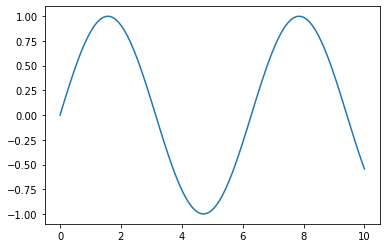

In [82]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))
plt.show()

Add axis ranges and labels:

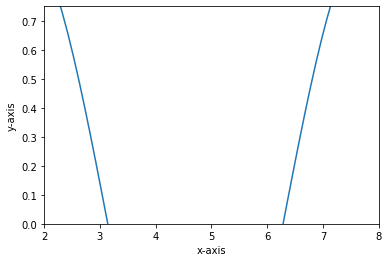

In [83]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))

plt.xlim([2, 8])
plt.ylim([0, 0.75])

plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.show()

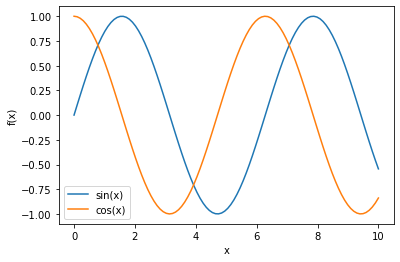

In [84]:
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x), label=('sin(x)'))
plt.plot(x, np.cos(x), label=('cos(x)'))

plt.ylabel('f(x)')
plt.xlabel('x')

plt.legend(loc='lower left')
plt.show()

## Scatter Plots

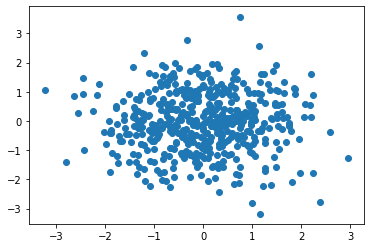

In [85]:
rng = np.random.RandomState(123)
x = rng.normal(size=500)
y = rng.normal(size=500)


plt.scatter(x, y)
plt.show()

### Bar Plots

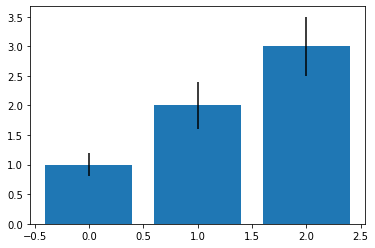

In [86]:
# input data
means = [1, 2, 3]
stddevs = [0.2, 0.4, 0.5]
bar_labels = ['bar 1', 'bar 2', 'bar 3']


# plot bars
x_pos = list(range(len(bar_labels)))
plt.bar(x_pos, means, yerr=stddevs)

plt.show()

### Histograms

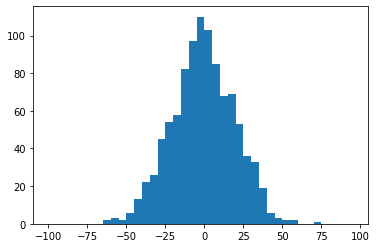

In [87]:
rng = np.random.RandomState(123)
x = rng.normal(0, 20, 1000) 

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.hist(x, bins=bins)
plt.show()

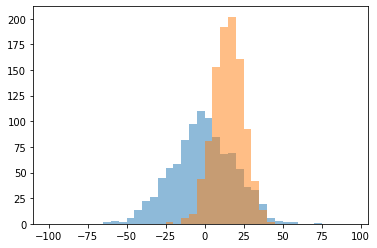

In [88]:
rng = np.random.RandomState(123)
x1 = rng.normal(0, 20, 1000) 
x2 = rng.normal(15, 10, 1000)

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.hist(x1, bins=bins, alpha=0.5)
plt.hist(x2, bins=bins, alpha=0.5)
plt.show()

### Subplots

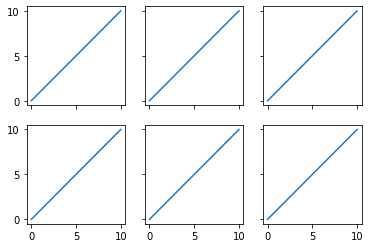

In [89]:

import matplotlib.pyplot as plt

x = range(11)
y = range(11)

fig, ax = plt.subplots(nrows=2, ncols=3,
                       sharex=True, sharey=True)

for row in ax:
    for col in row:
        col.plot(x, y)
        
plt.show()

### Colors and Markers

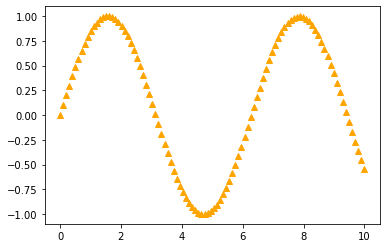

In [90]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x),
         color='orange',
         marker='^',
         linestyle='')
plt.show()

### Saving Plots

The file format for saving plots can be conveniently specified via the file suffix (.eps, .svg, .jpg, .png, .pdf, .tiff, etc.). Personally, I recommend using a vector graphics format (.eps, .svg, .pdf) whenever you can, which usually results in smaller file sizes than bitmap graphics (.jpg, .png, .bmp, tiff) and does not have a limited resolution.

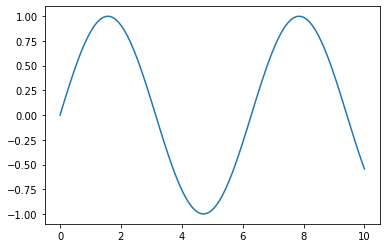

In [91]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))

plt.savefig('myplot.png', dpi=300)
plt.savefig('myplot.pdf')

plt.show()

## Resources

There are no reading assignments for this lecture. However, you should run this notebook on your computer from top to bottom at your own pace and make sure that you are comfortable with the different commands, most of which you may need for the problem sets.

NumPy and Matplotlib reference material:

- [The official NumPy documentation](https://docs.scipy.org/doc/numpy/reference/index.html)
- [The official Matplotlib Gallery](https://matplotlib.org/gallery/index.html)
- [The official Matplotlib Tutorials](https://matplotlib.org/tutorials/index.html)


Optional references books for using NumPy and SciPy. You are not expected to read this for this class, but I am listing it in case you are interested in learning NumPy for your projects.

- Rougier, N.P., 2016. [From Python to NumPy](http://www.labri.fr/perso/nrougier/from-python-to-numpy/).
- Oliphant, T.E., 2015. [A Guide to NumPy: 2nd Edition](https://www.amazon.com/Guide-NumPy-Travis-Oliphant-PhD/dp/151730007X). USA: Travis Oliphant, independent publishing.
- Varoquaux, G., Gouillart, E., Vahtras, O., Haenel, V., Rougier, N.P., Gommers, R., Pedregosa, F., Jędrzejewski-Szmek, Z., Virtanen, P., Combelles, C. and Pinte, D., 2015. [SciPy Lecture Notes](http://www.scipy-lectures.org/intro/numpy/index.html).
